# Welcome to Machine Learning.

# "ISBE"  The Motto and Main Steps when building a Machine Learning Model. 
## 1. I - Inspect and explore data.
## 2. S - Select and engineer features.
## 3. B - Build and train model.
## 4. E - Evaluate model.

In [2]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


# Helper function to split our data
from sklearn.model_selection import train_test_split

# This is our Logit model
from sklearn.linear_model import LogisticRegression

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Load data
df = pd.read_csv('data/titanic.csv')

# Display data
df.head()

## Data dictionary
<img src='https://miro.medium.com/max/1260/1*rr3UGlpEv_PSMc1pyqa4Uw.png'>


# Inspect and Explore EDA
1. Shape and size
1. Describe
1. Info
1. Check for nulls
1. Check for dupes
1. Plot

In [ ]:
# 1. Shape and size
print(df.shape)

In [ ]:
# 2. Describe
df.describe()

In [ ]:
# 3. Get info on cols
df.info()


## Inspect null values.
* What does this tell us about features we should and should not use. 

In [ ]:
# Inspect / check for nulls.
df.isnull().sum() 

In [ ]:
# Percentage of null values per columns
((df.isnull().sum() / len(df)) * 100).round(2)

## Inspect duplicate rows.
* Phew...

In [ ]:
n_dupes = df.duplicated().sum()
print("Number of duplicate rows are %i." % n_dupes)

# Visualize our data

In [ ]:
sns.pairplot(df, hue='survived');

In [ ]:
plt.figure(figsize=(13,8))
sns.kdeplot(data=df, x='age', hue='survived', shade=True)

In [ ]:
df.groupby('sex')['survived'].sum() / df.groupby('sex')['survived'].count()

In [ ]:
df.sex.value_counts(normalize=True)

# "S" Select and Engineer Features
1. Select the features you are going to want to use to predict survived. 
    * For this first example we are only going to be selecting `fare, sex, and pclass`
    * Don't use features that have nulls in them. 
1. Convert categorical variables into numerical. 
    * Use helper function `pd.get_dummies()` for this 
1. Split into test and train. 

In [12]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [14]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [15]:
df.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

### Convert categorical variables into numerical.
* `pd.get_dummies()` is a very helpful function that converts our categorical variables into continuous variables. 
* have to be careful about the ['dummy variable trap'](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)) which leads to multicollinearity problems which we just dont have time to discuss, [to learn more watch this](https://www.youtube.com/watch?v=Cba9LJ9lS8s&ab_channel=zedstatistics).  git  
* more about [dummy variable traps](https://medium.com/nerd-for-tech/what-is-dummy-variable-trap-how-it-can-be-handled-using-python-78ec17246331)
* Removing one of the dummy variable columns solves this. 


In [16]:
df = pd.get_dummies(df, columns=['sex', 'pclass'], drop_first=True)
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
pd.get_dummies(df, columns=['sex', 'pclass'], drop_first=True)

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_male,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1,1,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1,0,0


In [18]:
df = pd.get_dummies(df, columns=['sex', 'pclass'], drop_first=True)
df.head()

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_male,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [19]:
selected_features = ['fare', 'pclass_2', 'pclass_3', 'sex_male']

# Defining our X and y
### y is what we are trying to predict, and X is what we are using to make that prediction.
* It is industry standard to name your feature matrix as `X`, and your target variable as `y`


In [20]:
selected_features = ['fare', 'pclass_2', 'pclass_3', 'sex_male']

X = df[selected_features]

y = df['survived']


### Splitting our data into training and testing batches.


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', X_test.shape)

Lenght of our Training data: (712, 4) 
Length of our Testing data: (179, 4)


# "B" - Build and train our model
* Initalize an empty model
* Train our model using our `model.fit()` with our training data 

In [22]:
from sklearn.linear_model import LogisticRegression

# Initalize our model.  
# This will create an empty untrained Logistic Regression model.
model = LogisticRegression()

print(type(model))


<class 'sklearn.linear_model._logistic.LogisticRegression'>


# This is the heart of our ML process. 
This steps fits (aka trains) our model with our training data.

In [23]:
# !! THIS HAPPENS 'IN PLACE', MEANING IT DOESN'T RETURN ANYTHING !!
model.fit(X=X_train, y=y_train)

LogisticRegression()

In [24]:
# Make new predicitions
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1])

In [25]:
model.classes_

array([0, 1])

In [26]:
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba.round(2)


array([0.12, 0.92, 0.27, 0.88, 0.78, 0.12, 0.39, 0.26, 0.78, 0.87, 0.47,
       0.12, 0.12, 0.62, 0.42, 0.57, 0.26, 0.12, 0.12, 0.57, 0.88, 0.58,
       0.26, 0.12, 0.38, 0.79, 0.12, 0.27, 0.12, 0.26, 0.26, 0.28, 0.57,
       0.3 , 0.26, 0.86, 0.12, 0.13, 0.12, 0.6 , 0.12, 0.12, 0.78, 0.79,
       0.12, 0.12, 0.12, 0.39, 0.12, 0.12, 0.37, 0.59, 0.12, 0.26, 0.12,
       0.12, 0.39, 0.26, 0.12, 0.12, 0.12, 0.12, 0.26, 0.12, 0.58, 0.91,
       0.58, 0.58, 0.89, 0.87, 0.4 , 0.12, 0.86, 0.57, 0.12, 0.79, 0.57,
       0.26, 0.57, 0.12, 0.27, 0.41, 0.57, 0.79, 0.12, 0.43, 0.79, 0.12,
       0.37, 0.12, 0.12, 0.58, 0.78, 0.12, 0.12, 0.12, 0.12, 0.78, 0.12,
       0.9 , 0.13, 0.41, 0.12, 0.12, 0.12, 0.37, 0.12, 0.38, 0.27, 0.26,
       0.12, 0.12, 0.3 , 0.12, 0.92, 0.87, 0.78, 0.12, 0.26, 0.41, 0.78,
       0.12, 0.12, 0.58, 0.12, 0.27, 0.57, 0.57, 0.13, 0.12, 0.13, 0.87,
       0.91, 0.39, 0.27, 0.3 , 0.78, 0.38, 0.13, 0.12, 0.12, 0.92, 0.12,
       0.57, 0.44, 0.12, 0.57, 0.87, 0.12, 0.12, 0.

In [27]:
pred_df = pd.DataFrame.from_dict( 
    {'y_true': y_test, 
     'y_pred': y_pred, 
     'probability': y_pred_proba} )
pred_df

,y_true,y_pred,probability
631,0,0,0.117059
299,1,1,0.921584
405,0,0,0.268339
820,1,1,0.879566
717,1,1,0.779433
...,...,...,...
546,1,1,0.787554
1,1,1,0.872106
815,0,0,0.354725
805,0,0,0.117290


# E = Evaluate our model.

# Accuracy, our first look.
Is the percent of predicitions we got correct.
Good for general scoring, but bad in terms of when classes are imbalanced. 

It is the count of all the predictions you got correct divided by the total number of predictions.
Aka, Percent of predictions we got correct.


Accuracy = (TP + TN) / (TP + TN + FP + FN)


In [29]:
# Helper fuctions to evaluate our model. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

accuracy = accuracy_score(y_test, y_pred)
# Accuracy Score: 0.826816

print("Accuracy Score: %f" % accuracy)

Accuracy Score: 0.849162


# Precision
Out of all the times the MODEL says 'yes' what was the precentage it was correct. 
* The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative. 
* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
* If you want to raise precision (ie; only say yes when you are absolutely sure), raise your classification threshold.

In [30]:
precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)
print("In other words, when the model predicts someone survived, it is correct %f of the time." % precision)

Precision Score: 0.824561
In other words, when the model predicts someone survived, it is correct 0.824561 of the time.


# Recall
Out of all the times the ACTUAL is 'yes', how many did you get correct.  

Having high recall is important when the cost of missing a True Positive is high.  

For example, if you're detecting cancer.  Saying, you don't have cancer when you really do is really bad. Therefore, if you're building a model to detect cancer, you should optimize for having high recall.  You can do that by lowering your classification threshold. 

* The recall is intuitively the ability of the classifier to find all the positive samples.
* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
* if you want to raise recall, lower your classification threshold

In [31]:
recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)
print("In other words, it correctly identifies %f percent of all survivors" % recall)

Recall Score: 0.734375
In other words, it correctly identifies 0.734375 percent of all survivors


# F1 Score
The ‘harmonic mean’ of precision and recall. 

Good for an overall evaluation metric. 


The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 


F1 = 2 * (precision * recall) / (precision + recall)




In [32]:
from sklearn.metrics import f1_score

# F1 Score
f1_score(y_test, y_pred)

0.7768595041322315

* Confustion Matrix
    * True Positive (TP) - When you say yes and actual is yes.
    * False Positive (FP) - When you say yes and actual is no.
    * False Negative (FN) - When you say no and actual is yes.
    * True Negative (TN) - When you say no and actual is no. 

The first term (True or False) is if the prediction was correct or not. True means correct, False means incorrect.
The second term (Positive or Negative) is what the classifier guessed.  Did it say it Yes, or did it say No. 

True Positive (TP): A true positive is an outcome where the model correctly predicts the positive class. When we say YES survived, actual is YES survived. Having a high True-Positive rate is GOOD.

True Negative (TN): A true negative is an outcome where the model correctly predicts the negative class.  When we say NO survived, actual is NO survived. Having a high true-negative rate is GOOD.

False Negative (FN):  A false negative is an outcome where the model incorrectly predicts the negative class. We say NO survived, actual is YES survived.
Having a high False-Negative rate is BAD.

False Positive (FP):  A false positive is an outcome where the model incorrectly predicts the positive class. We say YES survived, actual is NO survived.
Having a high False-Positive rate is BAD.




# Confusion Matrix 

Text(67.25, 0.5, 'Actual')

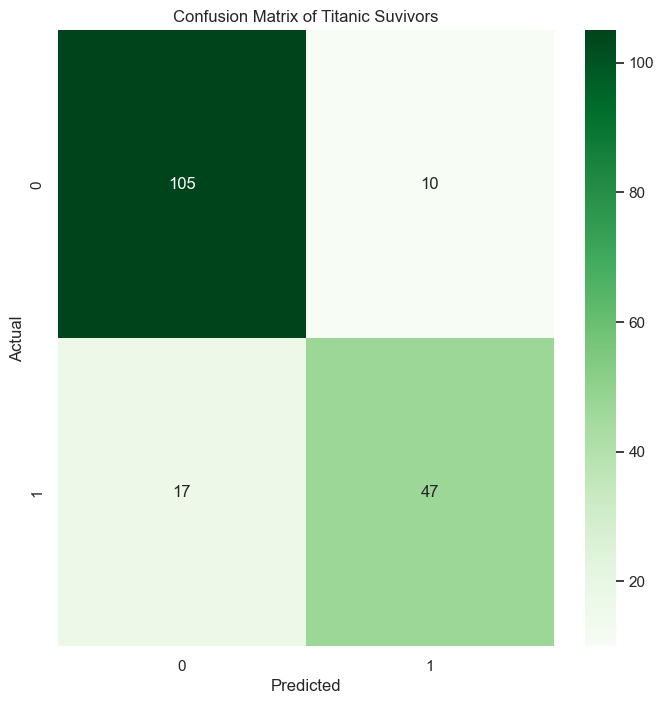

In [37]:

cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matrix of Titanic Suvivors")
plt.xlabel('Predicted')
plt.ylabel('Actual')

# print('true-negitive:', tn, 
#       '\nfalse-positive:', fp, 
#       '\nfalse-negative:', fn, 
#       '\ntrue-positive:', tp )

# Now the easy way

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       115
           1       0.82      0.73      0.78        64

    accuracy                           0.85       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179

